In [17]:

from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, a = symbols( 't k a' )
init_printing(use_unicode=True)

# Basis vectors for convenience:

v1 = N.i
v2 = N.j
v3 = N.k

# "Generic" choice of vector in the (dual of the) Lie algebra:

Phi = t*(v1 + 2*v2 + 3*v3)

# Define the interior vertices:

def P123(k,a):
    return Vector.zero

def P234(k,a):
    return k*N.i

def P134(k,a):
    return k*N.j

def P124(k,a):
    return k*N.j

# Exterior points coming from the cut:

def Q12_1(k,a):
    return -a*N.j

def Q12_2(k,a):
    return -a*N.i

def Q23_2(k,a):
    return (k+a)*N.i

def Q23_3(k,a):
    return k*N.i - a*N.j

def Q34_3(k,a):
    return k*N.i + (k+a)*N.j

def Q34_4(k,a):
    return (k+a)*N.i + k*N.j

def Q14_1(k,a):
    return (k+a)*N.j

def Q14_4(k,a):
    return -a*N.i + k*N.i

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:
# Delta34 is the bottom-left simplex:

def Delta34(k,a):
    return f( P12(k,a), v1, v2 ) * ( f( Vector.zero, -v1, -v2 ) + f( -a*v1, v1, v1 - v2 ) + f( -a*v2, v2, -v1 + v2 ) )

# Delta14 is the bottom-right simplex:

def Delta14(k,a):
    return f( P23(k,a), -v1, v2 ) * ( f( Vector.zero, v1, -v2 ) + f( a*v1, -v1, -v1 - v2 ) + f( -a*v2, v1 + v2, v2 ) )

# Delta12 is the top-right simplex:

def Delta12(k,a):
    return f( P34(k,a), -v1 , -v2 ) * ( f( Vector.zero, v1, v2 ) + f( a*v1, -v1 + v2, -v1 ) + f( a*v2, v1 - v2, -v2 ) )

# Delta23 is the top-left simplex:

def Delta23(k,a):
    return f( P14(k,a), v1 , -v2 ) * ( f( Vector.zero, v2, -v1 ) + f( -a*v1, v1, v1 + v2 ) + f( a*v2, -v1 - v2, -v2 ) )

# And their sum:

def Sum(k,a):
    return Delta34(k,a) + Delta14(k,a) + Delta12(k,a) + Delta23(k,a)

# Take the limit as t -> 0 to get the Euler characteristic(?):

def SumLimit(k,a):
    return limit(Sum(k,a),t,0)


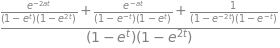

In [3]:
Delta34(k,a) # The bottom-left simplex

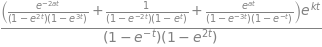

In [11]:
Delta14(k,a) # The bottom-right simplex

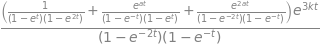

In [5]:
Delta12(k,a) # The top-right simplex

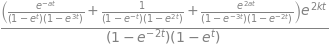

In [6]:
Delta23(k,a) # The top-left simplex

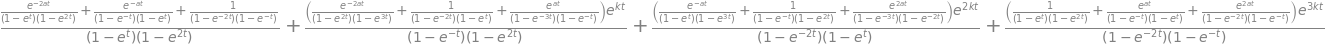

In [18]:
Sum(k,a) # Take their sum

In [19]:
SumLimit(k,a) # And let ϕ tend to zero

In [20]:
factor(SumLimit(k,a))

In [26]:
def Euler(k,a):    
    return factor(( Rational(1, 6) * (a + 1) * (a + 2) * (a**2 + 4*a*k + 3*a + 3*k**2 + 6*k + 3) ))


In [27]:
Euler(k,a)

In [48]:
# Calculate the lattice points by hand:

def AuxiliaryLatticePoints(k,a):
    return (k + 2*a + 1)**2 - 4 * ( ( Rational(1, 2) * (a+1) * (a + 2) ) - (a + 1) )

def LatticePoints(k,a):
    return factor(AuxiliaryLatticePoints(k,a))

In [49]:
LatticePoints(k,a)

In [50]:
LatticePoints(k,0)

In [52]:
LatticePoints(k,1)     # Is equal to (k+1)^{2} + 4(k+1)

In [53]:
Euler(k,1)

In [65]:
def EulerDiff(k,a):
    return factor(Euler(k,a) - Euler(k,a-1))

EulerDiff(k,a)

In [63]:
def kEulerAsymptotics(k,a):
    return limit(Euler(k,a) / (k**2), k, oo )

In [64]:
kEulerAsymptotics(k,a)

In [66]:
def kEulerDiffAsymptotic(k,a):
    return limit(EulerDiff(k,a) / (k**2), k, oo)

In [67]:
kEulerDiffAsymptotic(k,a)

In [68]:
def kLatticeAsymptotic(k,a):
    return limit(LatticePoints(k,a) / (k**2), k, oo)

kLatticeAsymptotic(k,a)